In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [ ]:
def get_stock_price(stock_id, start_date):
    url_temp = 'https://finance.naver.com/item/sise_day.nhn?code={}&page={}'
    page_num = 1
    date = []
    price = []
    flag = True

    while flag:
        url = url_temp.format(stock_id, page_num)
        resp = requests.get(url)
        soup = BeautifulSoup(resp.text)

        price_list = soup.find_all('span', class_='tah p11')
        price_temp = []
        for p in price_list:
            p = int(p.get_text().replace(',',''))
            if p > 0:
                price_temp.append(p)

        date_list = soup.find_all('span', class_='tah p10 gray03')
        i = 0
        for d in date_list:
            d = d.get_text()
            if d.replace('.','') < start_date:
                flag = False
                break
            date.append(d)
            price.append(price_temp[i])
            i += 5

        page_num += 1

    return pd.Series(price, date)

In [ ]:
def plot_stock_price(stock_id, start_date):
    stock_name = {'005930': 'Samsung Electronics', '051910': 'LG Chem', '035420': 'Naver'}

    stock = get_stock_price(stock_id, start_date)[::-1]
    stock_20days = stock.rolling(window=20).mean()

    plt.rcParams['figure.figsize'] = (11, 3)
    stock.plot()
    stock_20days.plot()
    plt.title(stock_name[stock_id])
    plt.legend(['Stock Price', '20 Days Moving Average'])
    plt.show()

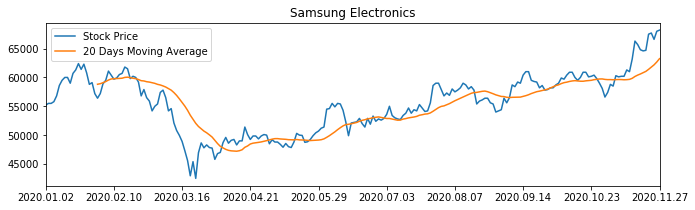

In [ ]:
plot_stock_price('005930', '20200101')

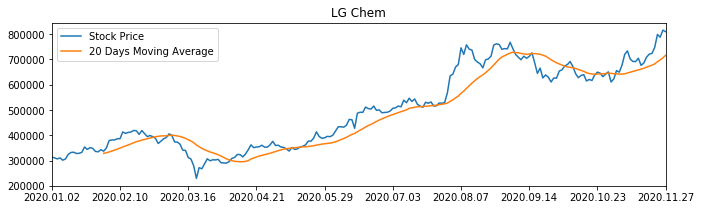

In [ ]:
plot_stock_price('051910', '20200101')

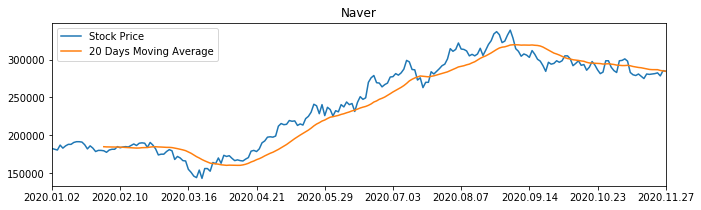

In [ ]:
plot_stock_price('035420', '20200101')